# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 7</span>

In [1]:
##run this cell to use the notebook

##it imports the modules
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy
import scipy.stats as ss
from scipy.stats import norm
from scipy.optimize import curve_fit
import numpy as np
import math
from math import pi


#and defines important methods

def f2plot(file,cat,pts):
    #this function takes a file and turns it into a
    #given matrix for plotting reasons
    table=np.zeros([cat,pts])
    lines=file.readlines()
    c=0
    for line in lines:
        line = line.replace("\n","")
        data = line.split(' ')
        for i in range(len(data)):
            table[i][c] = float(data[i])
        c += 1
    file.close()
    return table

mpl.rcParams['axes.titlesize'] = 16
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['legend.fontsize'] = 12
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

### Exercise 07.1
In the MD/MC code we have provided, include tail corrections for potential energy, $U$, and pressure $P$.

### Exercise 07.2

Use the MD/MC code to <span style="color:red">print out instantaneous values of potential energy per particle, $U/N$, along **equilibrated** Monte Carlo simulations</span> (of $M=5\times 10^5$ MC steps and where the Metropolis acceptance ratio has been fixed approximately to 50%) in the following thermodynamic conditions:
- solid phase: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)
- liquid phase: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)
- gas phase: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$)

1. <span style="color:red">Once this data has been produced, compute and make pictures with a python script of the autocorrelation functions of $U/N$ to approximately estimate how large the blocks in your simulations should be.
2. Use the same data to study, with a python script, the estimation of the statistical uncertainties of the expectation value of $U/N$ for different size of the blocks in the data blocking technique, from $L=M/N=10$ to $L=5\times 10^3$, being $N$ the number of blocks. <span style="color:red">Make pictures of these statistical uncertainties as a function of $L$.</span> What you observe in the statistical uncertainties after that the block size is large enough (from the point of view of the data blocking technique)?

### Exercise 07.3

<span style="color:red">Include the calculation of the radial distribution function, $g(r)$, as a function of the radial distance $r$ among particles, with $r \in \left[ 0; L/2\right]$ inside the MD/MC code</span>: average value of $g(r)$ in each block, final average value of $g(r)$ with statistical uncertainties in a separate file.

### Exercise 07.4

By means of your upgraded MD/MC code, equilibrate and <span style="color:red">perform MC NVT simulations via a Lennard-Jones model</span> of Argon ($\sigma = 0.34$ nm, $\epsilon/k_B = 120$ K, $m=39.948$ amu) in the following conditions:
1. solid phase: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)
2. liquid phase: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)
3. gas phase: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$)

show in pictures the obtained average values and uncertainties for the potential energy per particle, $U/N$, the pressure $P$ and the radial distribution function $g(r)$ in LJ units ... <span style="color:red"> and compare your MC results for the radial distribution function, $g(r)$, with those obtained with Molecular Dynamics NVE simulations in similar thermodynamic conditions.</span>

## Equilibration and acceptance rate


We make sure that the MC simulation is equilibrated and the acceptance ratio is close to 50%

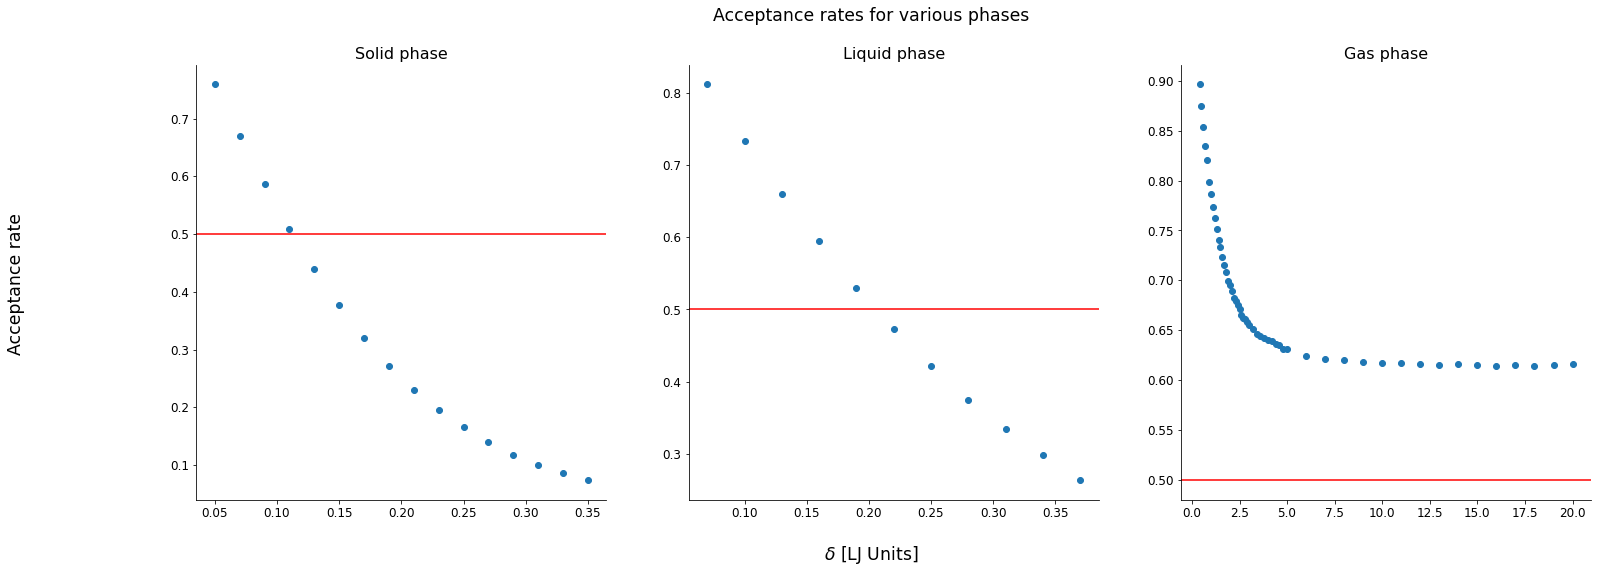

In [2]:


fig, ax = plt.subplots(1, 3, figsize=(25,8))
fig.suptitle('Acceptance rates for various phases',size='xx-large')
fig.supxlabel('$\delta$ [LJ Units]',size='xx-large')
fig.supylabel('Acceptance rate',size='xx-large')
f= open("acc_solid.dat","r")
data=f2plot(f,2,16)
ax[0].scatter(data[0],data[1])
ax[0].set_title('Solid phase')
f= open("acc_liquid.dat","r")
data=f2plot(f,2,11)
ax[1].scatter(data[0],data[1])
ax[1].set_title('Liquid phase')
f= open("acc_gas.dat","r")
data=f2plot(f,2,52)
ax[2].scatter(data[0],data[1])
ax[2].set_title('Gas phase')
for i in range(3):
    ax[i].axhline(y = 0.5, color = 'r', linestyle = '-')
plt.show()

Optimal step lengths turn out to be, in $\sigma$ units: 
 - 0.1 for the solid phase;
 - 0.2 for the liquid phase;
 
In the case of the gas phase, we reach a point where the acceptance rate hits a minimum and stays around 0.6. This may be because the step length becomes comparable with the size of the system (that is $\sim 13 \sigma$ ) and, because of PBC, increasing it doesn't give the particle any new place to go. IN the case of the gas phase we might be ok choosing a $\delta$ of 5

We are running our simulation in a NVT (canonical) ensemble. This means that T (or the kinetic energy) will be fixed but the potential energy won't. We need to let the simulation reach a point where the energy will fluctuate around a certain quantity.

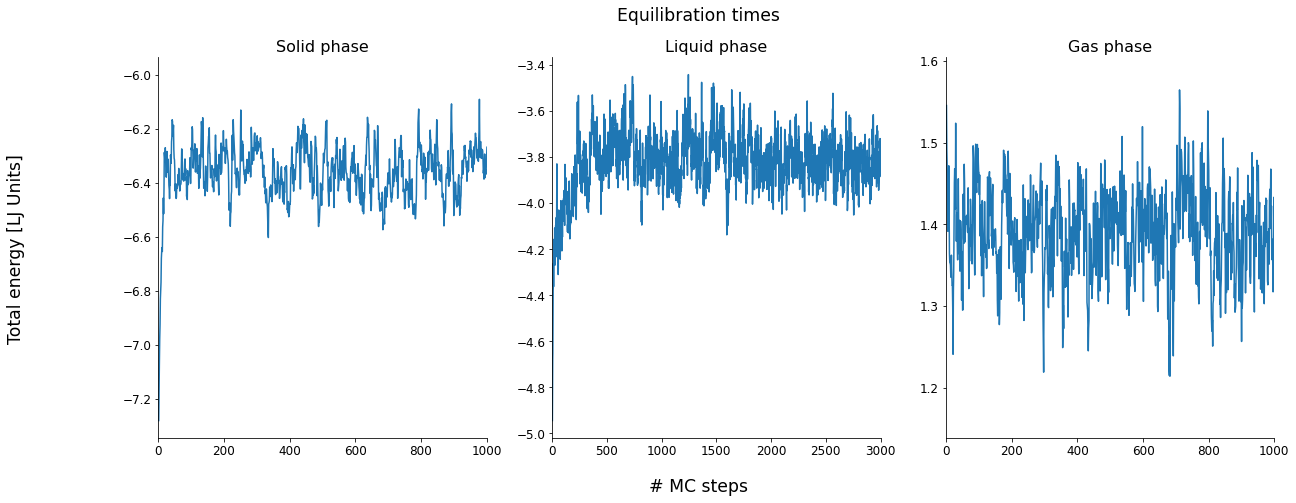

In [3]:
fig, ax = plt.subplots(1, 3, figsize=(20,7))
fig.suptitle('Equilibration times',size='xx-large')
fig.supxlabel('# MC steps',size='xx-large')
fig.supylabel('Total energy [LJ Units]',size='xx-large')
f= open("equi_solid.dat","r")
data=f2plot(f,4,10000)
ax[0].plot(data[0],data[1])
ax[0].set_title('Solid phase')
ax[0].set_xlim([0,1000])
f= open("equi_liquid.dat","r")
data=f2plot(f,4,10000)
ax[1].plot(data[0],data[1])
ax[1].set_title('Liquid phase')
ax[1].set_xlim([0,3000])
f= open("equi_gas.dat","r")
data=f2plot(f,4,20000)
ax[2].plot(data[0],data[1])
ax[2].set_xlim([0,1000])
ax[2].set_title('Gas phase')
plt.show()

The number of MC steps required to equilibrate the system is around
- 100 for the solid phase;
- 1000 for the liquid phase;
- 100 for the gas phase.

## Autocorrelation and block length

 We now evaluate the autocorrelation in "time" of the values of $<U>$. We will use the formula from M. E. J. Newman, G. T. Barkema:
$$\chi(t) = \frac{\frac{1}{t_{max}-t} \sum_{t'=0}^{t_{max}-t}m(t')m(t'+t) -
\left(\frac{1}{t_{max}-t}\right)^2 \sum_{t'=0}^{t_{max}-t}m(t')\sum_{t=0}^{t_{max}-t} m(t'+t)
}{\frac{1}{t_{max}}\sum_{t'=0}^{t_{max}}m^2(t') - \left( \frac{1}{t_{max}}\sum_{t'=0}^{t_{max}}m(t')\right)^2}$$

Since we expect the autocorrelation to depend exponentially on time, we just to compute $\chi$ until some thousand timesteps. We then read the file containing $<U>$ values and compute $\chi$

In [4]:
def blk_err(x,L):
    y=x[0:L-1:1]
    s2= np.var(y)
    s = np.sqrt(s2)
    return s


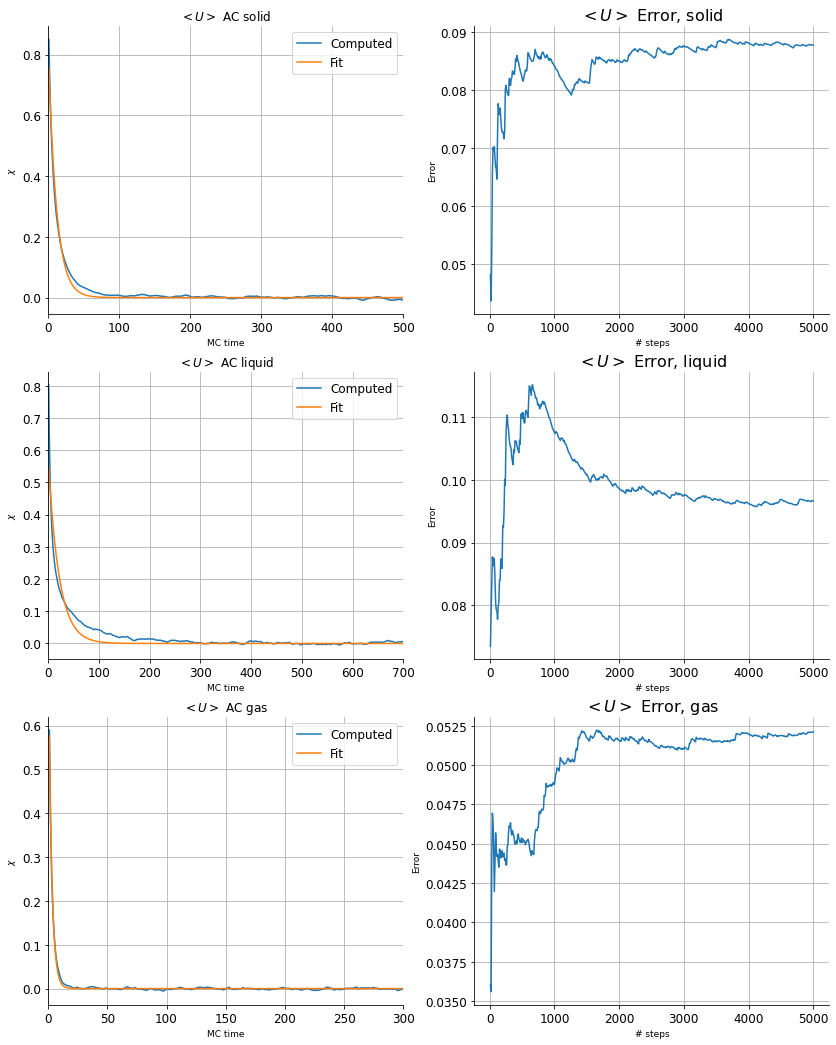

Autocorrelation tau for solid is  =  11.415771797417086 MC steps
Autocorrelation tau for liquid is =  21.491262327363724 MC steps
Autocorrelation tau for gas is    =  2.579342397895055 MC steps


In [5]:
import scipy

def expo(x,a,tau):
    y=a*np.exp(-x/tau)
    return y

lunghezze= np.linspace(10,5000,num=500)
lunghezze = lunghezze.astype(int)
fig, ax = plt.subplots(3, 2, figsize=(14,18))
f= open("etot_solid_autocorr.dat","r")
data=f2plot(f,2,1500)
ax[0,0].plot(data[0],data[1],label='Computed')
ax[0,0].set_title('$<U>$ AC solid',size='large')
a,tau_s = scipy.optimize.curve_fit(expo, data[0], data[1])[0]
ax[0,0].plot(data[0],a*np.exp(-data[0]/tau_s),label='Fit')
ax[0,0].set_xlim(0,500)

f=open("etot_solid.dat","r")
data=f2plot(f,4,500000)
y=np.zeros(500)
for i in range(len(lunghezze)):
    y[i] = blk_err(data[1],lunghezze[i])
ax[0,1].plot(lunghezze,y)

f= open("etot_liquid_autocorr.dat","r")
ax[1,0].set_title('$<U>$ AC liquid',size='large')
data=f2plot(f,2,1500)
ax[1,0].plot(data[0],data[1],label='Computed')
a,tau_l = scipy.optimize.curve_fit(expo, data[0], data[1])[0]
ax[1,0].plot(data[0],a*np.exp(-data[0]/tau_l),label='Fit')
ax[1,0].set_xlim(0,700)

f=open("etot_liquid.dat","r")
data=f2plot(f,4,500000)
for i in range(len(lunghezze)):
    y[i] = blk_err(data[1],lunghezze[i])
ax[1,1].plot(lunghezze,y)

f= open("etot_gas_autocorr.dat","r")
data=f2plot(f,2,1500)

ax[2,0].plot(data[0],data[1],label='Computed')
ax[2,0].set_title('$<U>$ AC gas',size='large')
a,tau_g = scipy.optimize.curve_fit(expo, data[0], data[1])[0]
ax[2,0].plot(data[0],a*np.exp(-data[0]/tau_g),label='Fit')
ax[2,0].set_xlim(0,300)

f=open("etot_gas.dat","r")
data=f2plot(f,4,500000)
for i in range(len(lunghezze)):
    y[i] = blk_err(data[1][1000:],lunghezze[i])
ax[2,1].plot(lunghezze,y)

ax[0,1].set_title('$<U>$ Error, solid')
ax[1,1].set_title('$<U>$ Error, liquid')
ax[2,1].set_title('$<U>$ Error, gas')
for i in range(3):
    for j in range(2):
        ax[i,j].grid()
        if(j):
            ax[i,j].set_xlabel('# steps', fontsize=9)
            ax[i,j].set_ylabel('Error', fontsize=9)

        else:
            ax[i,j].set_xlabel('MC time', fontsize=9)
            ax[i,j].set_ylabel('$\chi$', fontsize=9)
            ax[i,j].legend()


plt.show()

print("Autocorrelation tau for solid is  = ",tau_s, "MC steps")
print("Autocorrelation tau for liquid is = ",tau_l, "MC steps")
print("Autocorrelation tau for gas is    = ",tau_g, "MC steps")

The gas phase has an anomalous behaviour for the first $\sim$ 200 steps, suggesting that the equilibration needs to be longer. If we equilibrate the gas for 1000 steps, it shows the expected behaviour.

We notice that, around 1000 $\div$ 1500 steps/block the uncertainties in the block stabilize. This suggests 1500 as an optimal block size for our statistical computations.

## Pressure and $<U>$

We will plot the progressive averages for $<U>$ and P, including tail corrections.
We will use 350 blocks of 1500 steps each.

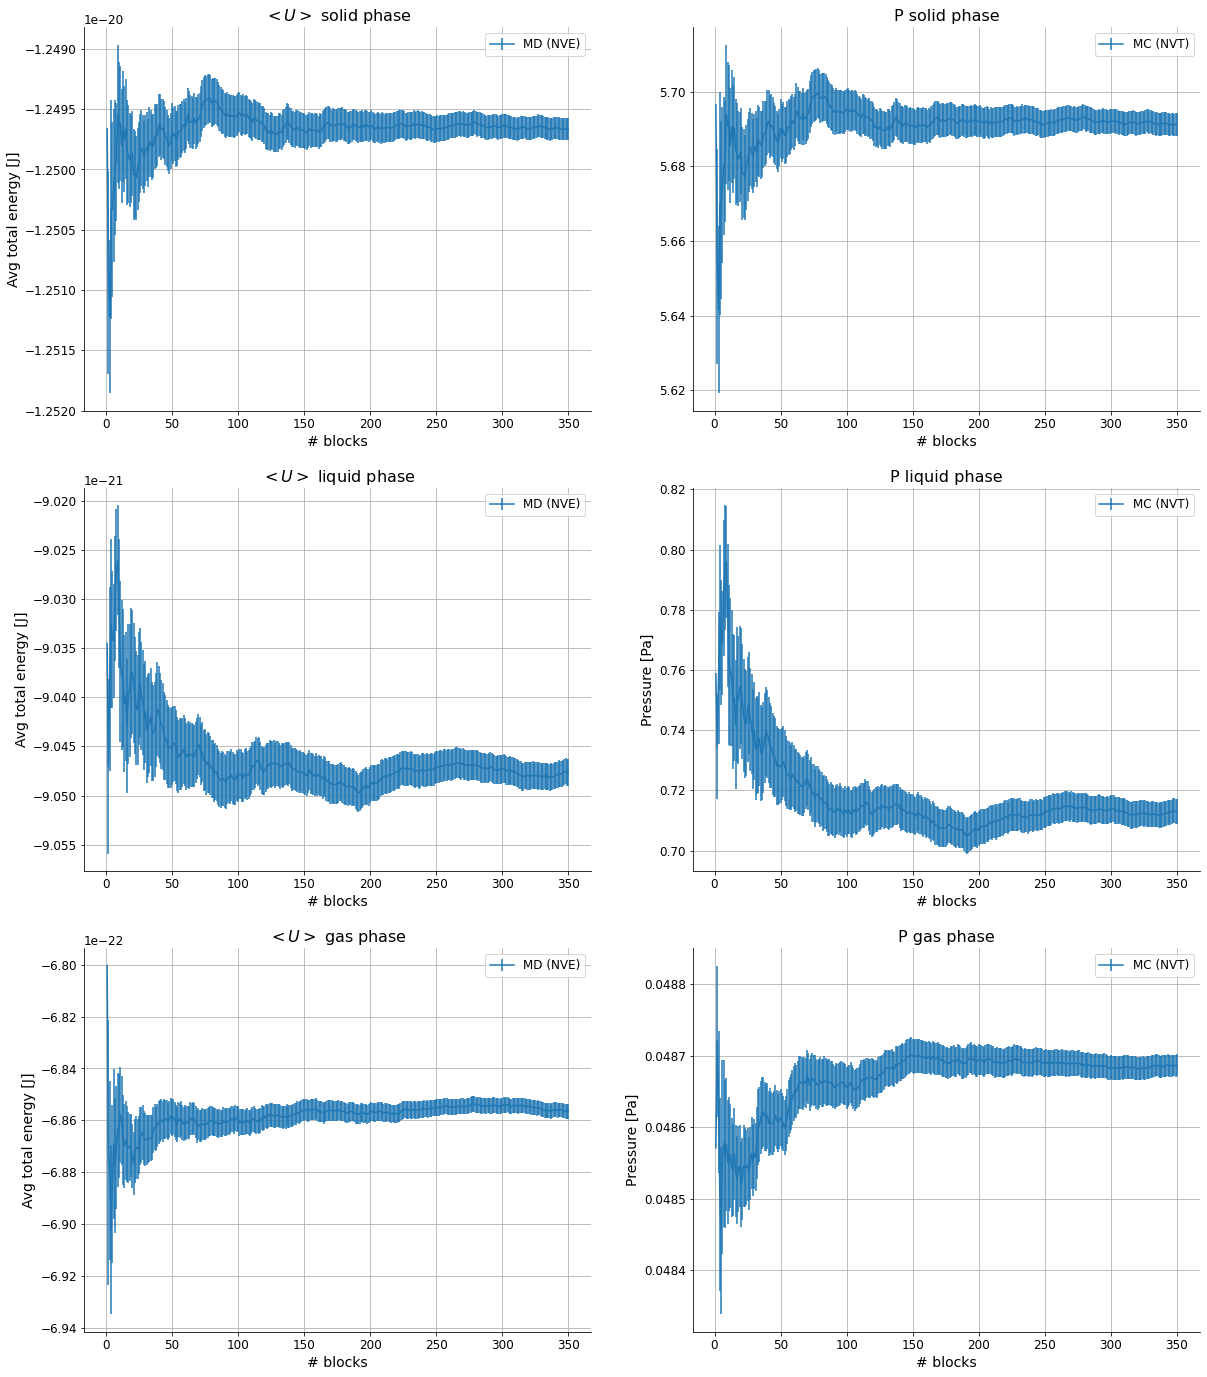

In [6]:
epsi=120*1.38e-23

fig, ax = plt.subplots(3,2,figsize=(20,24))
f=open("solid_epot_fin.dat","r")
data=f2plot(f,4,350)
ax[0,0].errorbar(data[0],data[2]*epsi,data[3]*epsi,label="MD (NVE)")
ax[0,0].set_title("$<U>$ solid phase")

ax[0,0].set_ylabel("Avg total energy [J]")
f=open("solid_pres_fin.dat","r")
data=f2plot(f,4,350)
ax[0,1].errorbar(data[0],data[2],data[3],label="MC (NVT)")
f=open("solidnve_pres_fin2.dat","r")
ax[0,1].set_title("P solid phase")
f=open("liquid_epot_fin.dat","r")
data=f2plot(f,4,350)
ax[1,0].errorbar(data[0],data[2]*epsi,data[3]*epsi,label="MD (NVE)")
ax[1,0].set_title("$<U>$ liquid phase")

ax[1,0].set_ylabel("Avg total energy [J]")
f=open("liquid_pres_fin.dat","r")
data=f2plot(f,4,350)
ax[1,1].errorbar(data[0],data[2],data[3],label="MC (NVT)")
ax[1,1].set_title("P liquid phase")
ax[1,1].set_ylabel("Pressure [Pa]")

f=open("gas_epot_fin.dat","r")
data=f2plot(f,4,350)
ax[2,0].errorbar(data[0],data[2]*epsi,data[3]*epsi,label="MD (NVE)")
ax[2,0].set_title("$<U>$ gas phase")

ax[2,0].set_ylabel("Avg total energy [J]")
f=open("gas_pres_fin.dat","r")
data=f2plot(f,4,350)
ax[2,1].errorbar(data[0],data[2],data[3],label="MC (NVT)")
ax[2,1].set_title("P gas phase")
ax[2,1].set_ylabel("Pressure [Pa]")



for a in ax:
    for b in a:
            b.legend()
            b.grid()
            b.set_xlabel("# blocks")
plt.show()

## Radial distribution function $g(r)$

We will use 50 blocks of 1500 steps each.

We will compare results from MD and MC simulations

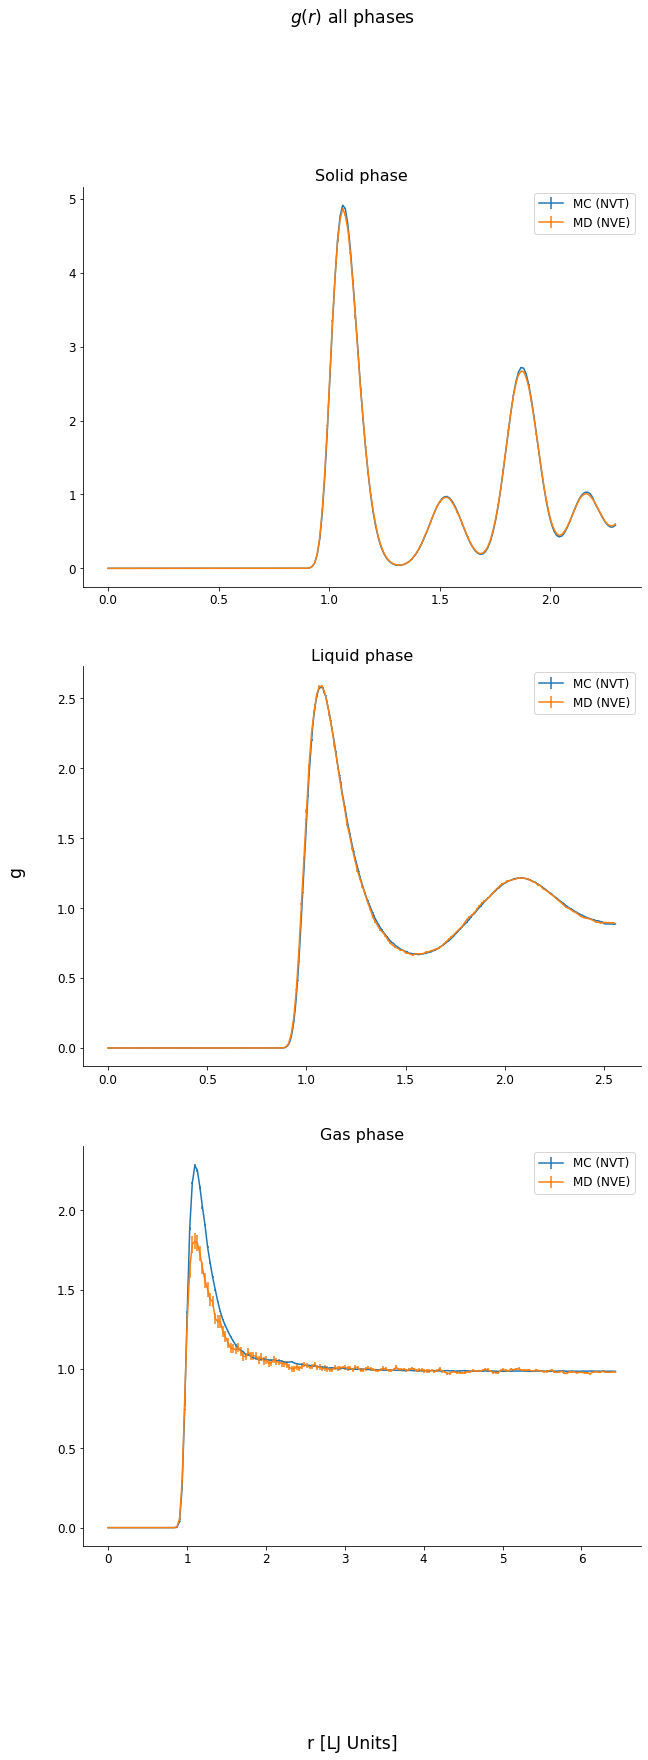

In [7]:
fig, ax = plt.subplots(3,1 , figsize=(10,25))
fig.suptitle('$g(r)$ all phases',size='xx-large')
fig.supxlabel('r [LJ Units]',size='xx-large')
fig.supylabel('g',size='xx-large')

f= open("solid_gfin.dat","r")
data=f2plot(f,3,200)
ax[0].errorbar(data[0],data[1],data[2],label='MC (NVT)')
ax[0].set_title('Solid phase')
f= open("solidnve_gfin.dat","r")
data=f2plot(f,3,200)
ax[0].errorbar(data[0],data[1],data[2],label='MD (NVE)')


f= open("liquid_gfin.dat","r")
data=f2plot(f,3,400)
ax[1].errorbar(data[0],data[1],data[2],label='MC (NVT)')
ax[1].set_title('Liquid phase')
f= open("liquidnve_gfin.dat","r")
data=f2plot(f,3,200)
ax[1].errorbar(data[0],data[1],data[2],label='MD (NVE)')

f= open("gas_gfin.dat","r")
data=f2plot(f,3,200)
ax[2].errorbar(data[0],data[1],data[2],label='MC (NVT)')
f= open("gasnve_gfin.dat","r")
data=f2plot(f,3,200)
ax[2].errorbar(data[0],data[1],data[2],label='MD (NVE)')
ax[2].set_title('Gas phase')

for a in ax:
    a.legend()
plt.show()


NVE simulations are a bit more noisey, but still show expected behaviour